In [1]:
import sys; sys.path.insert(0, '../..') # So that we import the local copy of pyzx if you have installed from Github
import random
import pyzx as zx


8


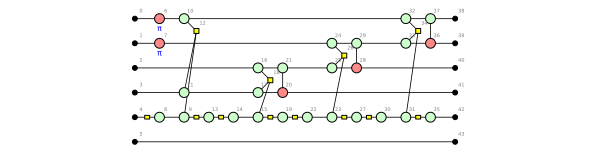

In [62]:

#random.seed(1337)
circ = zx.generate.cliffordT(5,20)
circ = zx.Circuit.load('mod5d2.tfc')
print(circ.depth())

zx.draw_matplotlib(circ,labels=True,h_edge_draw='box')


In [58]:
g = circ.copy().to_graph()
zx.clifford_simp(g)

2

In [59]:
#g.normalize() # Reposition nodes horizontally to look nicer
zx.draw(g) # This draw function by default uses the D3 Javascript library to draw the diagram. If it doesn't work, use draw_matplotlib() instead


In [25]:
from ipywidgets import widgets
from IPython.display import display, Markdown

from pyzx.simplify import clifford_iter

graph = circ.copy()
graphs = [zx.draw_matplotlib(graph)]
names = ["start"]
for gs, n in clifford_iter(graph):
    gs.normalize()
    graphs.append(zx.draw_matplotlib(gs))
    names.append(n)
zx.drawing.pack_circuit_nf(gs,'grg')
graphs.append(zx.draw_matplotlib(gs))
names.append("reposition")

def plotter(rewrite):
    display(Markdown("Rewrite step: " + names[rewrite]))
    display(graphs[rewrite])

w = widgets.interactive(plotter, rewrite=(0,len(graphs)-1))
slider = w.children[0]
slider.layout.width = "{!s}px".format(min(800,50*len(graphs)))
output = w.children[-1]
output.layout.height = "{!s}px".format(200+graph.qubit_count()*20)
slider.value = 0
w


interactive(children=(IntSlider(value=0, description='rewrite', layout=Layout(width='600px'), max=11), Output(…

In [60]:
circ2 = g.copy()
circ2.normalize()
circ2 = zx.extract_circuit(circ2)
print(circ2.depth())
zx.draw(circ2)


84


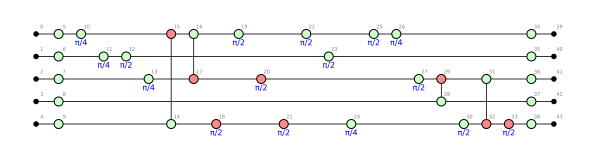

In [2]:
#random.seed(1337)
g = zx.generate.cliffordT(5,20)
zx.draw_matplotlib(g,labels=True,h_edge_draw='box')


In [3]:


from copy import deepcopy

# pyzx match ids

min_depth = 10000

queue = [g]
while len(queue) != 0:
    g1 = queue.pop(-1)

    print("Queue length:", len(queue))

    ids = zx.rules.match_ids_parallel(g1) # (identity_vertex, neighbor1, neighbor2, edge_type)
    lcomps = zx.rules.match_lcomp_parallel(g1) # (V,V)
    pivots = zx.rules.match_pivot_parallel(g1) + zx.rules.match_pivot_boundary(g1) + zx.rules.match_pivot_gadget(g1) # ((V,V), (V,V))
    # print("ids", ids)
    # print("lcomps", lcomps)
    # print("pivots", pivots)

    for id_match in ids:
        g2 = deepcopy(g1)
        etab, rem_verts, rem_edges, check_isolated_vertices = zx.rules.remove_ids(g2, [id_match])
        print(etab, rem_verts, rem_edges, check_isolated_vertices)
        try:
            g2.add_edge_table(etab)
            g2.remove_edges(rem_edges)
            g2.remove_vertices(rem_verts)
            if check_isolated_vertices:
                g2.remove_isolated_vertices()
            queue.append(g2)

            circ = zx.extrace_circuit(g2)
            circ = zx.basic_optimization(circ)
            if circ.depth() < min_depth:
                min_depth = circ.depth()
                print(min_depth)
        except:
            pass
    for pivot_match in pivots:
        g2 = deepcopy(g1)
        etab, rem_verts, rem_edges, check_isolated_vertices = zx.rules.pivot(g2, [pivot_match])
        print(etab, rem_verts, rem_edges, check_isolated_vertices)
        try:
            g2.add_edge_table(etab)
            g2.remove_edges(rem_edges)
            g2.remove_vertices(rem_verts)
            if check_isolated_vertices:
                g2.remove_isolated_vertices()
            queue.append(g2)

            circ = zx.extrace_circuit(g2)
            circ = zx.basic_optimization(circ)
            if circ.depth() < min_depth:
                min_depth = circ.depth()
                print(min_depth)
        except:
            pass
    for lcomp_match in lcomps:
        g2 = deepcopy(g1)
        etab, rem_verts, rem_edges, check_isolated_vertices = zx.rules.lcomp(g2, [lcomp_match])
        print(etab, rem_verts, rem_edges, check_isolated_vertices)
        try:
            g2.add_edge_table(etab)
            g2.remove_edges(rem_edges)
            g2.remove_vertices(rem_verts)
            if check_isolated_vertices:
                g2.remove_isolated_vertices()
            queue.append(g2)

            circ = zx.extrace_circuit(g2)
            circ = zx.basic_optimization(circ)
            if circ.depth() < min_depth:
                min_depth = circ.depth()
                print(min_depth)
        except:
            pass






ids [(5, 0, 10, 1), (6, 1, 11, 1), (7, 2, 13, 1), (8, 3, 28, 1), (9, 4, 14, 1), (34, 26, 39, 1), (35, 23, 40, 1), (36, 31, 41, 1), (37, 28, 42, 1), (38, 33, 43, 1)]
lcomps []
pivots []
{(0, 10): [1, 0]} [5] [] False
{(1, 11): [1, 0]} [6] [] False
{(2, 13): [1, 0]} [7] [] False
{(3, 28): [1, 0]} [8] [] False
{(4, 14): [1, 0]} [9] [] False
{(26, 39): [1, 0]} [34] [] False
{(23, 40): [1, 0]} [35] [] False
{(31, 41): [1, 0]} [36] [] False
{(28, 42): [1, 0]} [37] [] False
{(33, 43): [1, 0]} [38] [] False
{(0, 10): [1, 0]} [5] [] False
{(1, 11): [1, 0]} [6] [] False
{(2, 13): [1, 0]} [7] [] False
{(3, 28): [1, 0]} [8] [] False
{(4, 14): [1, 0]} [9] [] False
{(26, 39): [1, 0]} [34] [] False
{(23, 40): [1, 0]} [35] [] False
{(31, 41): [1, 0]} [36] [] False
{(28, 42): [1, 0]} [37] [] False
{(33, 43): [1, 0]} [38] [] False
{(0, 10): [1, 0]} [5] [] False
{(1, 11): [1, 0]} [6] [] False
{(2, 13): [1, 0]} [7] [] False
{(3, 28): [1, 0]} [8] [] False
{(4, 14): [1, 0]} [9] [] False
{(26, 39): [1, 0]} [